# Generating Reports for Organization
Generate the reports of the overall usage of the organizations.  
Reports define organization usage metrics in one place for the day, week, or month.  
Administrators can monitor who is using which services, consuming how much credits and storage within certain time period.

### Content Usage

In [29]:
from arcgis.gis import GIS
online_gis = GIS(profile='ds24_online')
online_gis

GIS @ https://pythonapi.maps.arcgis.com version:2024.1

In [30]:
import datetime as _dt
import pandas as pd

In [31]:
content_report_item = online_gis.users.me.report(
            report_type='content', duration="monthly"
    
        )
content_report_item

`start_time` is not honored with report type of content and users.


<Item title:"OrganizationItems_2024-03-14" type:Administrative Report owner:jayber_ds24>

In [32]:
# creating the report creates a new item with a CSV
# let's grab the CSV and analyze it
content_report_csv_file = content_report_item.get_data()
content_report_df = pd.read_csv(content_report_csv_file)

In [33]:
content_report_df.sort_values(by=['View Counts'], ascending=False).head()

,Title,Item ID,Item Url,Item Type,Date Created,Date Modified,Content Category,View Counts,Owner,File Storage Size,Feature Storage Size,Share Level,# of Groups shared with,Tags,Number of Comments,Is Hosted Service,Date Last Viewed,In Recycle Bin
831,Denmark_Administration,2535bcde2bc34d65b4aa2dbdfc7f2be5,https://services8.arcgis.com/SZN16RkUszkfOcmq/...,Feature Service,2024-02-12 19:14:50,2024-02-12 19:15:16,NaN,140,jyaist_pythonapi,0.00000,5.67188,org,0,oma_testing,0,True,2024-02-13 21:00:00,No
1137,user_report,63f9229f20954a24a48501eb20f64a6b,https://services8.arcgis.com/SZN16RkUszkfOcmq/...,Feature Service,2023-10-11 12:26:07,2023-11-14 05:30:22,NaN,130,naubry_pythonapi,0.00000,0.01563,private,0,NaN,0,True,2023-11-14 08:00:00,No
813,content_report,a89ed5e93b464a2182187215826672c5,https://services8.arcgis.com/SZN16RkUszkfOcmq/...,Feature Service,2023-10-11 12:25:59,2023-11-14 05:29:45,NaN,88,naubry_pythonapi,0.00000,0.56250,private,0,NaN,0,True,2023-11-14 08:00:00,No
838,DNK_Administration_OMA,1b7059bb1c764b4ea0c54b13a9b9bbcc,NaN,Web Map,2024-02-12 19:20:46,2024-02-12 22:32:46,NaN,86,jyaist_pythonapi,0.08379,0.00000,private,0,ago_oma_tests,0,False,2024-02-13 21:00:00,No
823,credit_report,d409192886b846c5b2e07675a73c9dc9,https://services8.arcgis.com/SZN16RkUszkfOcmq/...,Feature Service,2023-10-11 12:25:50,2023-11-14 05:30:26,NaN,61,naubry_pythonapi,0.00000,0.01563,private,0,NaN,0,True,2023-11-14 08:00:00,No


In [34]:
content_report_df.sort_values(by=['File Storage Size'], ascending=False).head()[['Title','Item Type', 'File Storage Size']]

,Title,Item Type,File Storage Size
1139,VectorTileServe-0b5c2368a59f4e809a160ae0e1ff6daf,Vector Tile Package,40.35118
1140,VectorTileServe-1b3f152e17ec47338f56ab1ee23b8cc8,Vector Tile Package,35.06602
885,homicide_data,CSV,5.14979
933,Ontario Election Results 2014,Feature Collection,4.90739
934,Ontario Election Results 2014,Feature Collection,4.90739


In [35]:
greatest_storage = content_report_df.groupby("Owner")['File Storage Size'].sum()
greatest_storage.nlargest(4)

Owner
jyaist_pythonapi         80.43073
naubry_pythonapi         14.01772
nparavicini_pythonapi    11.97669
daisyw_pythonapi          5.17501
Name: File Storage Size, dtype: float64

### Credit Usage

In [36]:
credit_report_item = online_gis.users.me.report(
    report_type='credits', duration="weekly"
)
credit_report_item

<Item title:"OrganizationCreditsWeekly_2024-03-W2" type:Administrative Report owner:jayber_ds24>

In [38]:
# creating the report creates a new item with a CSV
# let's grab the CSV and analyze it
credit_report_csv_file = credit_report_item.get_data()
# note the skiprows=3 on the csv read; there are 3 rows of metadata headers on this output file
credit_report_df = pd.read_csv(credit_report_csv_file, skiprows=3)

In [39]:
credit_report_df

,Username,Geocoding,Service Areas,Closest Facility Routes,Multi-Vehicle Routes,GeoEnrichment,Simple Routes,Optimized Routes,Location-Allocation,Origin Destination Cost Matrix,Spatial Analysis,Demographic Maps,Feature Reports,Tile Generation,Scene Layer Generation From Features,ArcGIS Notebook - Interactive,ArcGIS Notebook - Scheduled,Data Pipelines - Interactive,Data Pipelines - Scheduled
0,jayber_ds24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
1,jyaist_pythonapi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,alices_pythonapi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,daisyw_pythonapi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,devnparavicini,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,edwardj_pythonapi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,everythingrole,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,johnnychang_pythonapi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,python_collaboration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,sheila_collaborator,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


-----------

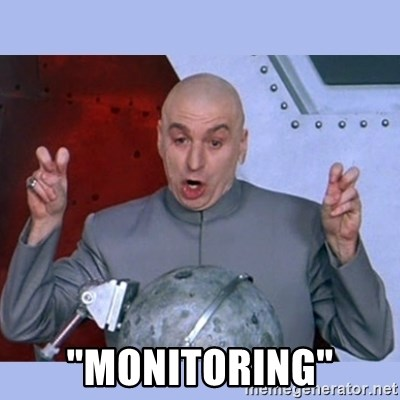

## Using Search Operations to Monitor Sites

- The `search` and `advanced_search` operations allows administrators to query GIS systems easily to find out information about the system
- The information can easily be parsed using other 3rd party libraries like pandas
- This information can be queried multiple times a day or hour, as needed

#### Content

Example: Finding Content Generated Using Searches

Full documentation on advanced searching: https://doc.arcgis.com/en/arcgis-online/reference/advanced-search.htm

In [41]:
content_manager = online_gis.content
# get content from the last week
import datetime as _dt
now = _dt.datetime.now()
then = now - _dt.timedelta(days=7)
search = content_manager.advanced_search(
            f"orgid: {online_gis.properties.id} AND created: [{int(then.timestamp()* 1000)} TO {int(now.timestamp()* 1000)}] AND accountid:{online_gis.properties.id}", 
            max_items=-1, as_dict=True)
recent_content_df = pd.DataFrame(search['results'])
recent_content_df

,id,owner,created,isOrgItem,modified,guid,name,title,type,typeKeywords,...,numComments,numRatings,avgRating,numViews,scoreCompleteness,groupDesignations,token1ExpirationDate,token2ExpirationDate,contentOrigin,lastViewed
0,de81f22cb7b84ea4bb5cd745521d061c,jyaist_pythonapi,1710358348000,True,1710358350000,None,None,Allie Co-Worker Map,Web Map,"[ArcGIS API for JavaScript, ArcGIS Online, Exp...",...,0,0,0,0,33,None,-1,-1,self,-1
1,6f541f8774594705bdcf1c834e5a2f19,jyaist_pythonapi,1710358353000,True,1710358358000,None,None,Allie Co-Worker Map,Web Mapping Application,"[configurableApp, JavaScript, Map, Mapping Sit...",...,0,0,0,1,33,None,-1,-1,self,1710356400000
2,28fa12aa913f448b85f294db1e57dfc5,jyaist_pythonapi,1710358332000,True,1710396353000,None,Allie_CoworkerMap,Allie_CoworkerMap,Feature Service,"[ArcGIS Server, Data, Feature Access, Feature ...",...,0,0,0,6,33,None,-1,-1,self,1710396000000
3,47b4cb78eb424817b7bc41ec9c40cb5b,nparavicini_pythonapi,1710285164000,True,1710285171000,None,None,"Formerly Local, Now Global Experience",Web Experience,"[EXB Experience, expbuilderapp:python-api-2.3....",...,0,0,0,0,33,None,-1,-1,self,-1
4,71bbbe6e7d084f03b08752ce999878cd,nparavicini_pythonapi,1710285765000,True,1710285787000,None,None,"Formerly Local, Now Global Experience",Web Experience,"[EXB Experience, expbuilderapp:python-api-2.3....",...,0,0,0,1,33,None,-1,-1,self,1710284400000
5,029877d0e0304037b183120462789d07,nparavicini_pythonapi,1710290370000,True,1710290389000,None,None,"Formerly Local, Now Global Experience",Web Experience,"[EXB Experience, expbuilderapp:python-api-2.3....",...,0,0,0,1,33,None,-1,-1,self,1710288000000
6,0651d65d54c649d3970898332c04d6e9,nparavicini_pythonapi,1710283618000,True,1710283769000,None,None,"Formerly Local, Now Global Experience",Web Experience,"[EXB Experience, expbuilderapp:python-api-2.3....",...,0,0,0,2,33,None,-1,-1,self,1710280800000
7,39ca9243b64548e594c898af7bab8a97,nparavicini_pythonapi,1710291050000,True,1710291076000,None,None,"Formerly Local, Now Global Experience",Web Experience,"[EXB Experience, expbuilderapp:python-api-2.3....",...,0,0,0,1,33,None,-1,-1,self,1710288000000
8,cc578f6a1d834f83a30ffd43e1fcb172,nparavicini_pythonapi,1710288378000,True,1710288385000,None,None,"Formerly Local, Now Global Experience",Web Experience,"[EXB Experience, expbuilderapp:python-api-2.3....",...,0,0,0,4,33,None,-1,-1,self,1710288000000
9,b28be595ab5547aca3916fc07a481ddd,nparavicini_pythonapi,1710289673000,True,1710289680000,None,None,"Formerly Local, Now Global Experience",Web Experience,"[EXB Experience, expbuilderapp:python-api-2.3....",...,0,0,0,1,33,None,-1,-1,self,1710288000000


In [42]:
recent_content_df.type.value_counts()

type
Web Experience             20
Web Map                     3
Feature Service             2
Administrative Report       2
Web Mapping Application     1
Notebook                    1
Name: count, dtype: int64

#### Users

In [43]:
user_manager = online_gis.users
users = user_manager.advanced_search(f"accountid:{online_gis.properties.id}", max_users=-1)
# users who have never logged in:
[user for user in users['results'] if user['lastLogin'] == -1]

[<User username:devnparavicini>,
 <User username:edwardj_pythonapi>,
 <User username:sheila_collaborator>]

In [44]:
# find users who haven't logged in for a while
now = _dt.datetime.now(_dt.timezone.utc)
stale_users = [
    user for user in users['results'] if user['lastLogin'] > -1 and \
    (now - _dt.datetime.fromtimestamp(user['lastLogin']/1000, _dt.timezone.utc)).days >= 90
]
stale_users

[<User username:alices_pythonapi>,
 <User username:bobj_pythonapi>,
 <User username:charlied_pythonapi>,
 <User username:daisyw_pythonapi>,
 <User username:everythingrole>,
 <User username:johnnychang_pythonapi>]